In [17]:
# import libraries
import pandas as pd
import numpy as np
import nltk
import zipfile
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
# Download data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2022-10-06 08:43:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   121KB/s    in 1.6s    

2022-10-06 08:43:06 (121 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [3]:
# extract data
zip_ref = zipfile.ZipFile('./smsspamcollection.zip') # create zipfile object
zip_ref.extractall('./') # extract file to dir
zip_ref.close() # close file

In [4]:
messages = pd.read_csv('./SMSSpamCollection', sep='\t', names=['label','message'])

In [5]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='label', ylabel='count'>

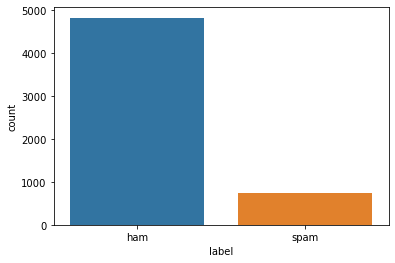

In [19]:
sns.countplot(x='label', data=messages)

In [42]:
# Stemming text
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus = []
import time

t1 = time.time()
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
t2 = time.time()
print(t2-t1)

8.071585893630981


In [43]:
# Stemming text
from nltk.stem import SnowballStemmer 
ps = SnowballStemmer("english")
corpus = []
import time

t1 = time.time()
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
t2 = time.time()
print(t2-t1)

7.912498712539673


In [7]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [9]:
X.shape

(5572, 5000)

In [29]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values

In [30]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [11]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)

In [13]:
y_pred = spam_detect_model.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9847533632286996

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[946,   9],
       [  8, 152]])

In [20]:
# train on complete dataset
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X, y)

In [23]:
import pickle

In [25]:
pickle.dump(model, open('model.pkl','wb'))

In [26]:
pickle.dump(cv, open('word2vec.pkl','wb'))

In [44]:
0.025*10000/60

4.166666666666667

# Deploy

In [35]:
text = messages['message'][2]

In [36]:
text

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"